In [2]:
import pandas as pd

In [28]:
audio = pd.read_csv('data/audio_features_hot_100_1958_2019.csv')
audio.head()

,track_id,artist,track,spotify_genre,spotify_track_id,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,0.734,...,10.0,-4.803,0.0,0.0735,0.01700,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,A Star Is Born Soundtrack,0.0,215733.0,88.0,0.572,...,7.0,-6.362,1.0,0.0308,0.37100,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",0Xek5rqai2jcOWCYWJfVCF,Hollywood's Bleeding,1.0,196760.0,86.0,0.542,...,6.0,-4.169,1.0,0.2100,0.05880,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,Bacc At It Again,1.0,228185.0,61.0,0.948,...,8.0,-5.725,0.0,0.1680,0.00124,0.000001,0.0716,0.856,135.979,4.0


In [ ]:
# billboard = pd.read_csv('data/billboard_hot_100_1958_2019.csv')
# billboard.head()

In [30]:
genre = pd.read_csv('data/songGenre.csv')[['track_id','supergenre']].rename(columns = {'songid':'SongID'})
genre = genre.drop_duplicates()
genre['supergenre'].unique()

array(['pop', 'country', 'rap', 'hiphop', 'other', 'latin', 'house',
       'folk', 'r&b', 'adult standards', 'rock', 'metal', 'show tunes',
       'soul', 'jazz'], dtype=object)

In [44]:
join_df = genre.merge(audio, on = 'track_id', how = 'left').dropna(how='any')
target = join_df[['supergenre']]
feature_names =['spotify_track_duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','valence']
features = join_df[feature_names]
features.head()

,spotify_track_duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence
0,270740.0,0.734,0.836,-4.803,0.0735,0.01700,0.000016,0.623
2,215733.0,0.572,0.385,-6.362,0.0308,0.37100,0.000000,0.323
3,215733.0,0.572,0.385,-6.362,0.0308,0.37100,0.000000,0.323
4,196760.0,0.542,0.674,-4.169,0.2100,0.05880,0.000000,0.667
5,228185.0,0.948,0.623,-5.725,0.1680,0.00124,0.000001,0.856


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
transform = features 
transform.head()
features = pd.DataFrame(scaler.fit_transform(transform))
features.head()

,0,1,2,3,4,5,6,7
0,0.724930,0.887160,1.089516,1.081177,0.021188,-0.986422,-0.240036,0.074276
1,-0.083008,-0.171642,-1.165912,0.649717,-0.509763,0.265609,-0.240156,-1.185554
2,-0.083008,-0.171642,-1.165912,0.649717,-0.509763,0.265609,-0.240156,-1.185554
3,-0.361682,-0.367716,0.279362,1.256639,1.718488,-0.838584,-0.240156,0.259052
4,0.099885,2.285823,0.024314,0.826009,1.196242,-1.042162,-0.240148,1.052745


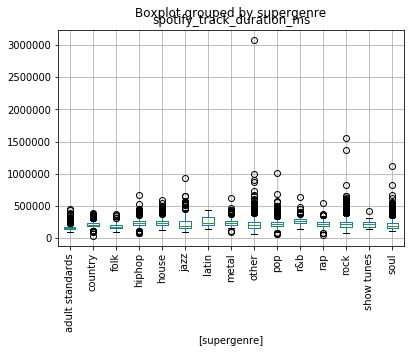

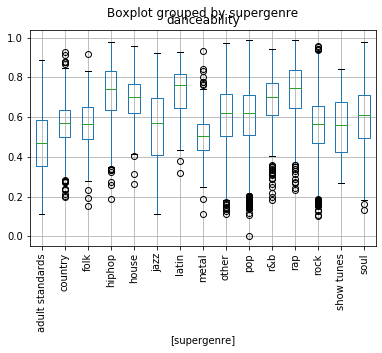

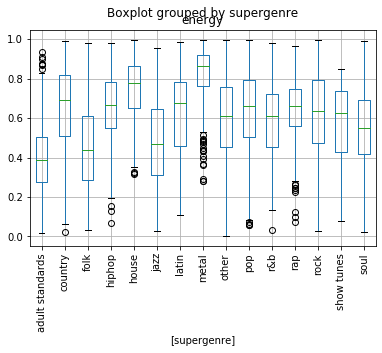

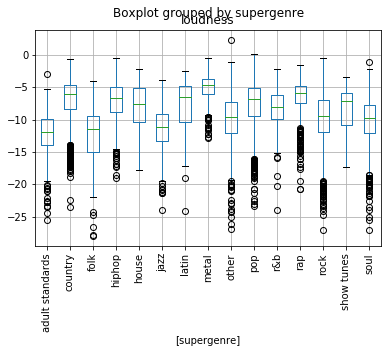

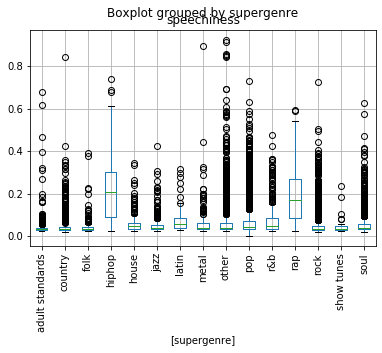

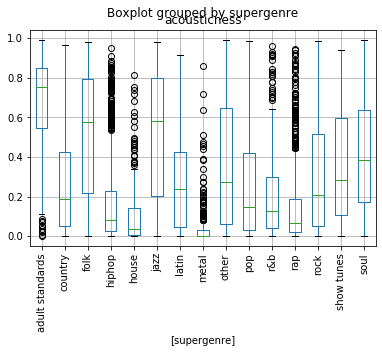

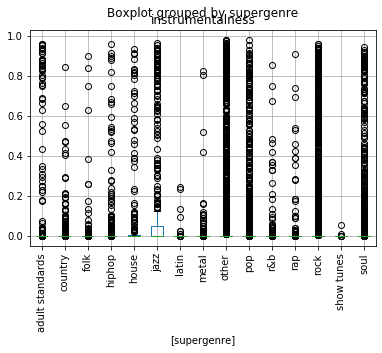

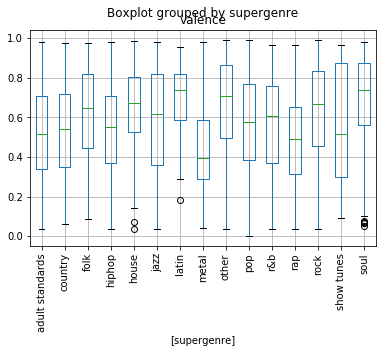

In [53]:
for field in feature_names:
    boxplot = join_df[['supergenre',f'{field}']].boxplot(by='supergenre',rot=90)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=420)

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train.values.ravel())
rf.score(X_test, y_test)

0.41928365303004583

In [56]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.14504002061289067, 'speechiness'),
 (0.1390384280413352, 'loudness'),
 (0.13154133918288347, 'danceability'),
 (0.1298091435848155, 'spotify_track_duration_ms'),
 (0.12492590708030027, 'acousticness'),
 (0.12427595990230063, 'valence'),
 (0.11995845446029023, 'energy'),
 (0.08541074713518411, 'instrumentalness')]

In [57]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [58]:
# Create the parameter grid based on the results of random search 
feature_grid = {
    'bootstrap': [True],
    'max_depth': [10, 40, 100],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 1000, 2000]
}
print(feature_grid)


{'bootstrap': [True], 'max_depth': [10, 40, 100], 'n_estimators': [100, 200, 1000, 2000]}


In [59]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rf, feature_grid, verbose=3, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [37]:
print(grid.best_params_)
print(grid.best_score_)
predictions = grid.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

{'bootstrap': True, 'max_depth': 80, 'n_estimators': 1000}
0.41753696227178044
                 precision    recall  f1-score   support

adult standards       0.50      0.02      0.04        50
        country       0.58      0.29      0.39       262
           folk       0.00      0.00      0.00        32
         hiphop       0.51      0.29      0.37       146
          house       0.00      0.00      0.00        51
           jazz       0.36      0.05      0.09        78
          latin       1.00      0.07      0.13        14
          metal       0.67      0.04      0.07        52
          other       0.34      0.24      0.28       481
            pop       0.43      0.53      0.48       827
            r&b       1.00      0.06      0.11        51
            rap       0.61      0.42      0.50       164
           rock       0.43      0.76      0.55       972
     show tunes       0.00      0.00      0.00         5
           soul       0.35      0.09      0.14       328

       

C:\Users\msflo\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# import joblib
# joblib.dump(rf, 'model_RandomForest.sav')